<a href="https://colab.research.google.com/github/ANANDAPADMANABHA/projects/blob/main/BreastCancerDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()


Saving data.csv to data.csv


In [4]:
df = pd.read_csv("data.csv")
df.head(7)

id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0    842302         M  ...                  0.11890          NaN
1    842517         M  ...                  0.08902          NaN
2  84300903         M  ...                  0.08758          NaN
3  84348301         M  ...                  0.17300          NaN
4  84358402         M  ...                  0.07678          NaN
5    843786         M  ...                  0.12440          NaN
6    844359         M  ...                  0.08368          NaN

[7 rows x 33 columns]

In [5]:
df.shape

(569, 33)

count the number of empty values in each column

In [6]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Drop the colum with missing values

In [7]:
df = df.dropna(axis = 1)

get the new count of number of rows and columns

In [8]:
df.shape

(569, 32)

Get a count of the number of Malignant (M) or Benign (B) cells

In [9]:
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Visualize the count

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


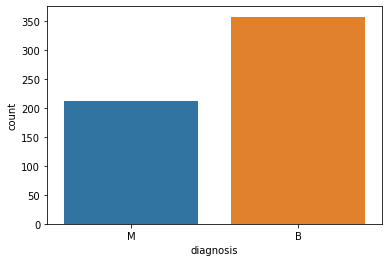

In [10]:
sns.countplot(df["diagnosis"],label = "count")

Look at the data types to see which columns need to be encoded

In [11]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

Encoding the categorical data value

In [12]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df.iloc[:,1]=labelencoder_Y.fit_transform(df.iloc[:,1].values)

Create a pairplot

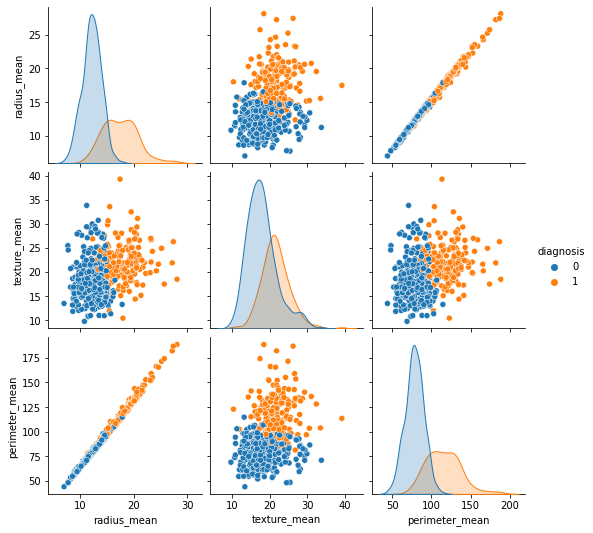

In [13]:
sns.pairplot(df.iloc[:,1:5] ,hue ="diagnosis")

print the first five rows of the new dataset

In [14]:
df.head()

id  diagnosis  ...  symmetry_worst  fractal_dimension_worst
0    842302          1  ...          0.4601                  0.11890
1    842517          1  ...          0.2750                  0.08902
2  84300903          1  ...          0.3613                  0.08758
3  84348301          1  ...          0.6638                  0.17300
4  84358402          1  ...          0.2364                  0.07678

[5 rows x 32 columns]

Get the corelation of the columns

In [15]:
df.iloc[:,1:12].corr()

diagnosis  ...  fractal_dimension_mean
diagnosis                1.000000  ...               -0.012838
radius_mean              0.730029  ...               -0.311631
texture_mean             0.415185  ...               -0.076437
perimeter_mean           0.742636  ...               -0.261477
area_mean                0.708984  ...               -0.283110
smoothness_mean          0.358560  ...                0.584792
compactness_mean         0.596534  ...                0.565369
concavity_mean           0.696360  ...                0.336783
concave points_mean      0.776614  ...                0.166917
symmetry_mean            0.330499  ...                0.479921
fractal_dimension_mean  -0.012838  ...                1.000000

[11 rows x 11 columns]

Visualize the corelation

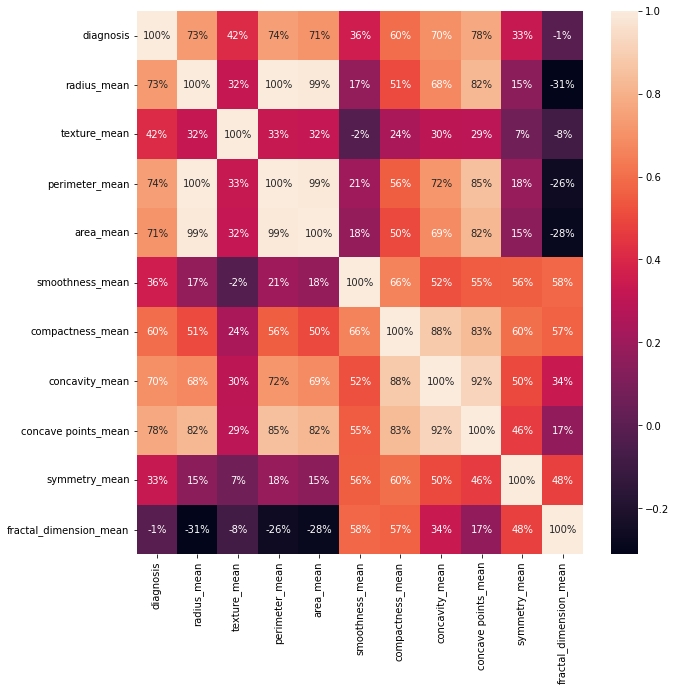

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:12].corr(),annot =True, fmt='.0%')

Split the dataset into independent(X) and dependent (Y) data sets

In [19]:
X = df.iloc[:,2:31].values
Y = df.iloc[:,1].values

Splitiing the dataset

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25, random_state = 0)

Scale the data (Feature Scaling)

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


Create a function for the models

In [26]:
def models(X_train,Y_train):

  #Logistic Regression
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state= 0)
  log.fit(X_train, Y_train)

  #Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion= "entropy", random_state=0)
  tree.fit(X_train,Y_train)

  #Random Forest Classifier
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators=10, criterion="entropy", random_state= 0 )
  forest.fit(X_train , Y_train)

  #Print the models accuracy on the training data
  print("[0] LOgistic regression Training accuracy     : ",log.score(X_train, Y_train))
  print("[1] Decision Tree Classifier Training accuracy: ",tree.score(X_train, Y_train))
  print("[2] Random Forest CLassifier Training accuracy: ",forest.score(X_train, Y_train))

  return log, tree, forest


Getting all the models

In [27]:
model = models(X_train,Y_train)

[0] LOgistic regression Training accuracy     :  0.9906103286384976
[1] Decision Tree Classifier Training accuracy:  1.0
[2] Random Forest CLassifier Training accuracy:  0.9953051643192489


Test model accuracy on test data on confusion matrix

In [31]:
from sklearn.metrics import confusion_matrix

for i in range(len(model)):
  print("Model ", i)
  cm = confusion_matrix(Y_test,model[i].predict(X_test))
  
  TP = cm[0][0]
  TN = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]

  print(cm)
  print("Testing Accuracy = ", (TP + TN)/(TP + TN + FN + FP))
  print()

Model  0
[[86  4]
 [ 3 50]]
Testing Accuracy =  0.951048951048951

Model  1
[[83  7]
 [ 2 51]]
Testing Accuracy =  0.9370629370629371

Model  2
[[87  3]
 [ 2 51]]
Testing Accuracy =  0.965034965034965

